In [44]:
import numpy as np
import pandas as pd


In [45]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [46]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
df.shape

(5572, 5)

In [48]:
#Data cleaning
#EDA
#Data pre-processing
#Model building
#Evaluation
#Improvement
#Website
#deploy


## Data cleaning ##

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [50]:
#drop last 3 columns as these columns contains less no of values.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [51]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.sample(5)

,v1,v2
2674,ham,I am 6 ft. We will be a good combination!
871,ham,Its going good...no problem..but still need li...
4452,ham,Or I guess &lt;#&gt; min
5546,ham,Ic. There are a lotta childporn cars then.
3413,ham,No pic. Please re-send.


In [53]:
#Renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [54]:
df.sample(5)

,target,text
3908,ham,Serious? What like proper tongued her
5066,spam,83039 62735=å£450 UK Break AccommodationVouche...
3804,ham,Dude while were makin those weirdy brownies my...
638,ham,"What will we do in the shower, baby?"
1163,ham,"New Theory: Argument wins d SITUATION, but los..."


In [55]:
#labelencoder is used for converting categorical features into ordinal numerical data.
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [56]:
df['target']=encoder.fit_transform(df['target'])

In [57]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [59]:
#check for duplicate values
df.duplicated().sum()

403

In [60]:
#remove duplicates
df=df.drop_duplicates(keep='first')      #keep first occurance and remove duplicates of it.


In [61]:
df.duplicated().sum()

0

In [62]:
df.shape

(5169, 2)

## EDA ##

In [63]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

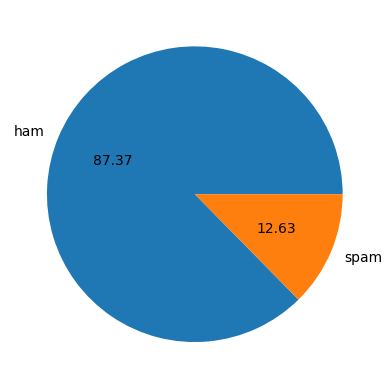

In [64]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [65]:
#data is imbalanced


In [66]:
import nltk

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
df['num_characters']=df['text'].apply(len)      #no of characters in the sentence

In [69]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [70]:
#fetch number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [71]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [72]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [73]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [74]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
#ham messages
df[df['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
#spam messages
df[df['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [77]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

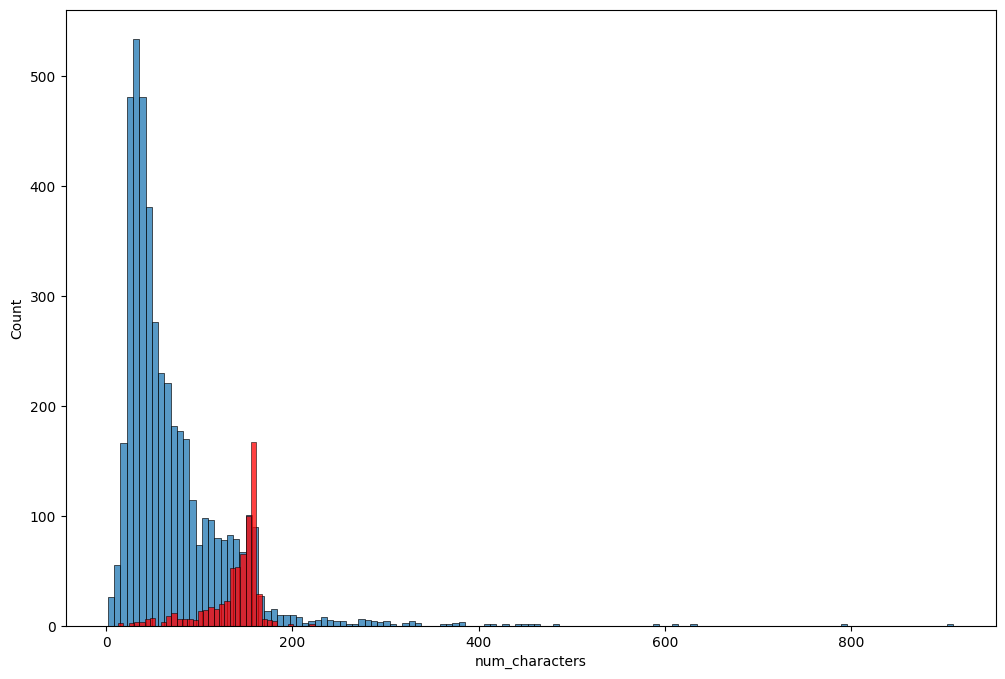

In [78]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

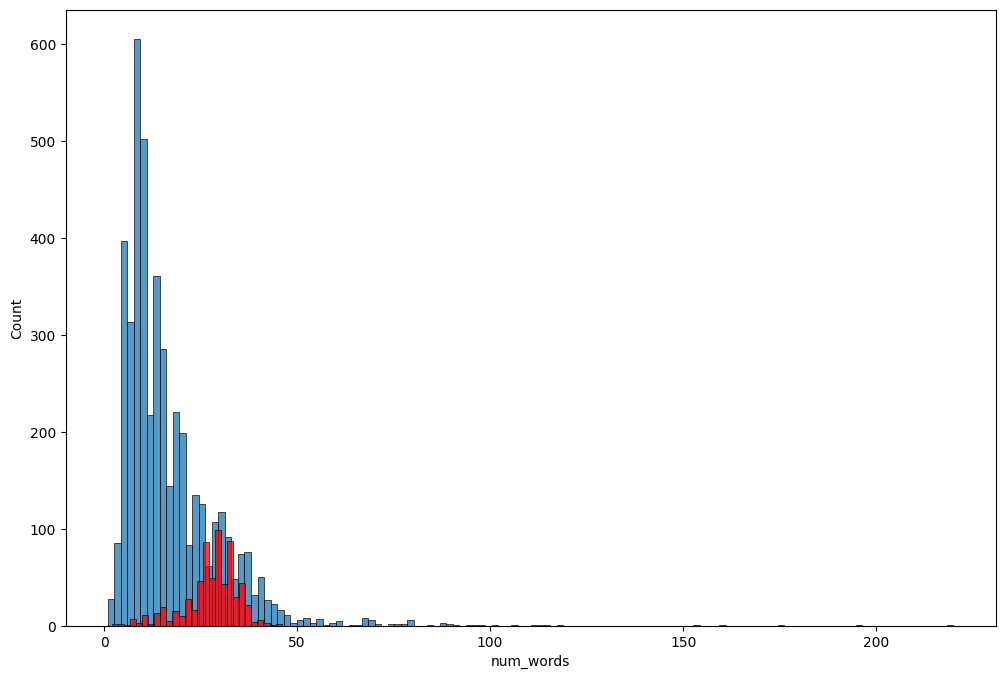

In [79]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

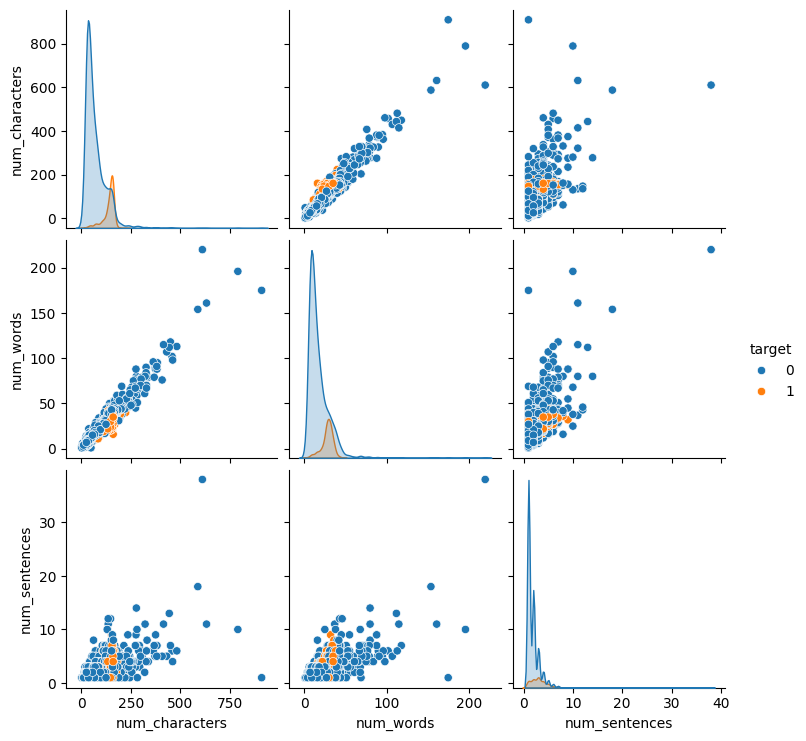

In [80]:
sns.pairplot(df,hue='target')

## Data pre-processing ##
Lower case

tokenization

Removing special characters

Removing stopwords and punctuations

stemming



In [81]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [82]:
#stopwords means have no use in the meaning of sentence just only use in the formation of sentence.

In [83]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [84]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [85]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [86]:
df['transformed_text']=df['text'].apply(transform_text)

In [87]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [96]:
len(spam_corpus)

9939

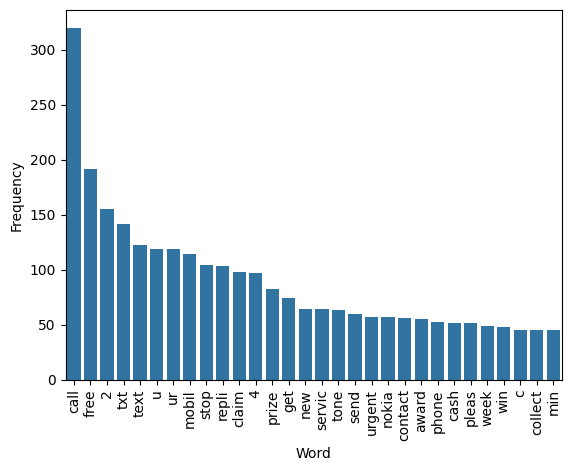

In [103]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use seaborn's barplot function, correctly specifying the 'x' and 'y' parameters.
sns.barplot(x='Word', y='Frequency', data=data)
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [107]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [108]:
len(ham_corpus)

35404

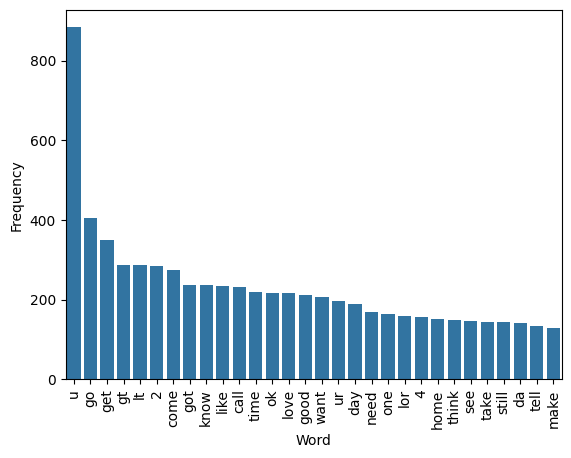

In [109]:
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use seaborn's barplot function, correctly specifying the 'x' and 'y' parameters.
sns.barplot(x='Word', y='Frequency', data=data)
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

## Model Building ##

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [111]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [112]:
x.shape

(5169, 6708)

In [113]:
y=df['target'].values

In [114]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [117]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [118]:
gnb=GaussianNB()

In [119]:
mnb=MultinomialNB()

In [120]:
bb=BernoulliNB()

In [121]:
gnb.fit(x_train, y_train)

GaussianNB()

In [122]:
y_pred1=gnb.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [125]:
accuracy_score(y_test , y_pred1)

0.8800773694390716

In [127]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)

accuracy_score(y_test , y_pred2)

0.9642166344294004

In [128]:
bb.fit(x_train, y_train)
y_pred3=mnb.predict(x_test)

accuracy_score(y_test , y_pred3)

0.9642166344294004

In [130]:
print(confusion_matrix(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred3))

[[792 104]
 [ 20 118]]
[[871  25]
 [ 12 126]]
[[871  25]
 [ 12 126]]


In [132]:
print(precision_score(y_test,y_pred1))
print(precision_score(y_test,y_pred2))
print(precision_score(y_test,y_pred3))

0.5315315315315315
0.8344370860927153
0.8344370860927153


In [ ]:
import pickle
pickle.dump(tfidf,open(vec